<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.159457,-235.465405,-185.305948,49.433506,-234.739454
1,0.0,1.0,38.173785,25.075845,73.249630,47.255667,25.993963
2,0.0,2.0,55.061304,109.726600,174.787904,65.777507,109.010398
3,0.0,3.0,61.332675,-25.214541,46.118134,72.655801,-26.537667
4,0.0,4.0,56.592077,122.633214,189.225291,67.456422,121.768869
...,...,...,...,...,...,...,...
249995,999.0,245.0,67.354332,52.967884,130.322216,88.603175,41.719041
249996,999.0,246.0,43.518030,-73.068260,-19.550230,46.262186,-65.812417
249997,999.0,247.0,96.973681,-32.972923,74.000758,141.216727,-67.215969
249998,999.0,248.0,38.842054,-44.124850,4.717204,37.956140,-33.238936


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    40.159457 -235.465405 -185.305948   49.433506 -234.739454
      1.0    38.173785   25.075845   73.249630   47.255667   25.993963
      2.0    55.061304  109.726600  174.787904   65.777507  109.010398
      3.0    61.332675  -25.214541   46.118134   72.655801  -26.537667
      4.0    56.592077  122.633214  189.225291   67.456422  121.768869
...                ...         ...         ...         ...         ...
999.0 245.0  67.354332   52.967884  130.322216   88.603175   41.719041
      246.0  43.518030  -73.068260  -19.550230   46.262186  -65.812417
      247.0  96.973681  -32.972923   74.000758  141.216727  -67.215969
      248.0  38.842054  -44.124850    4.717204   37.956140  -33.238936
      249.0  73.089380  183.238492  266.327872   98.790477  167.537395

[250000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    40.159457 -235.465405 -185.305948   49.433506 -234.739454
      1.0    38.173785   25.075845   73.249630   47.255667   25.993963
      2.0    55.061304  109.726600  174.787904   65.777507  109.010398
      3.0    61.332675  -25.214541   46.118134   72.655801  -26.537667
      4.0    56.592077  122.633214  189.225291   67.456422  121.768869
...                ...         ...         ...         ...         ...
999.0 245.0  67.354332   52.967884  130.322216   88.603175   41.719041
      246.0  43.518030  -73.068260  -19.550230   46.262186  -65.812417
      247.0  96.973681  -32.972923   74.000758  141.216727  -67.215969
      248.0  38.842054  -44.124850    4.717204   37.956140  -33.238936
      249.0  73.089380  183.238492  266.327872   98.790477  167.537395

[250000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.159457,-235.465405,-185.305948,49.433506,-234.739454
1,0.0,1.0,38.173785,25.075845,73.249630,47.255667,25.993963
2,0.0,2.0,55.061304,109.726600,174.787904,65.777507,109.010398
3,0.0,3.0,61.332675,-25.214541,46.118134,72.655801,-26.537667
4,0.0,4.0,56.592077,122.633214,189.225291,67.456422,121.768869
...,...,...,...,...,...,...,...
249995,999.0,245.0,67.354332,52.967884,130.322216,88.603175,41.719041
249996,999.0,246.0,43.518030,-73.068260,-19.550230,46.262186,-65.812417
249997,999.0,247.0,96.973681,-32.972923,74.000758,141.216727,-67.215969
249998,999.0,248.0,38.842054,-44.124850,4.717204,37.956140,-33.238936


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    40.159457 -235.465405 -185.305948   49.433506 -234.739454
      1.0    38.173785   25.075845   73.249630   47.255667   25.993963
      2.0    55.061304  109.726600  174.787904   65.777507  109.010398
      3.0    61.332675  -25.214541   46.118134   72.655801  -26.537667
      4.0    56.592077  122.633214  189.225291   67.456422  121.768869
...                ...         ...         ...         ...         ...
999.0 245.0  67.354332   52.967884  130.322216   88.603175   41.719041
      246.0  43.518030  -73.068260  -19.550230   46.262186  -65.812417
      247.0  96.973681  -32.972923   74.000758  141.216727  -67.215969
      248.0  38.842054  -44.124850    4.717204   37.956140  -33.238936
      249.0  73.089380  183.238492  266.327872   98.790477  167.537395

[250000 rows x 5 columns]

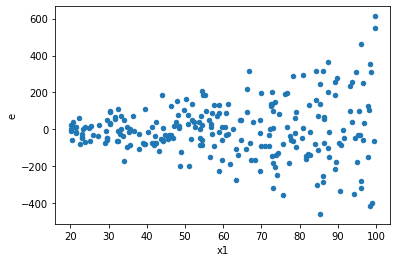

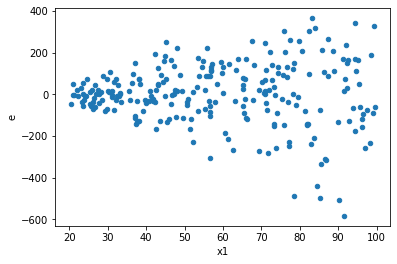

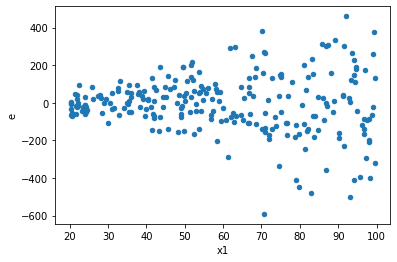

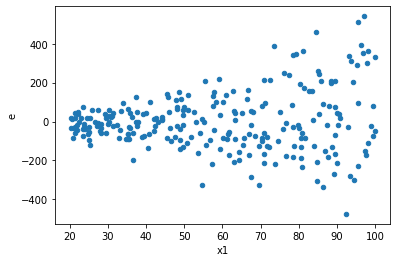

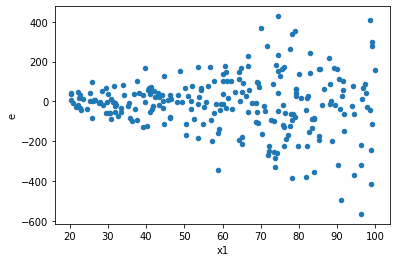

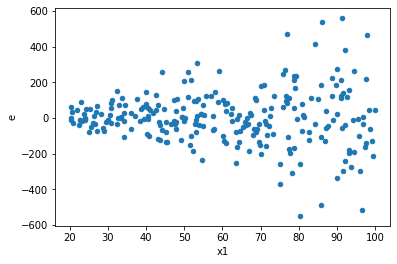

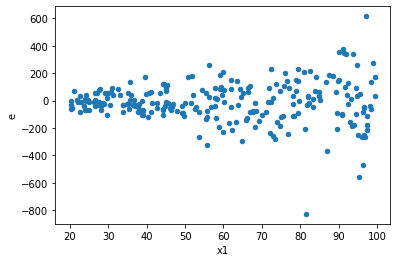

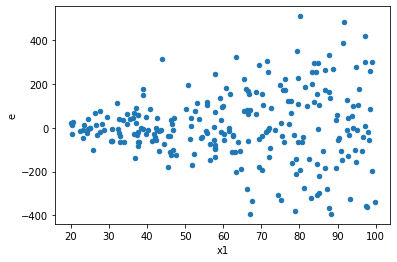

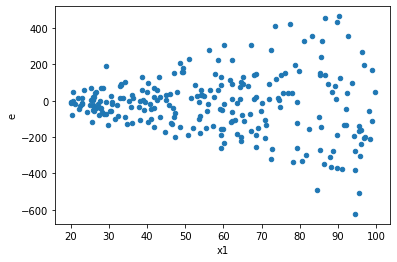

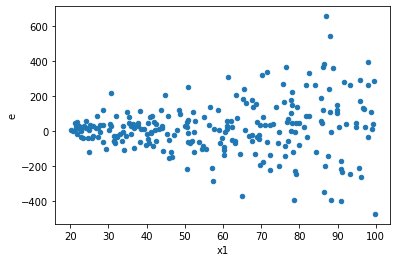

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,137.0,111.0,1080605.3538765945,4467290.99821184,7887.630320267112,40245.864848755315,5.102402523270436,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,131.0,117.0,926891.8892553556,4709695.354498671,7075.510605002714,40253.80644870659,5.689173360894306,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,137.0,111.0,1199587.1358865837,4006423.804649505,8756.11048092397,36093.908149995535,4.122139416654186,1.7741363933510002e-13,0.9999999999999113,8.870681966755001e-14,Reject005=0 : Heteroscedasticity
4.0,122.0,126.0,1070799.1305493305,5569796.3473541485,8777.042053683037,44204.732915509114,5.036404365518546,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,125.0,123.0,1058403.4801791832,4442510.89592869,8467.227841433465,36117.974763647886,4.265619803793218,1.0658141036401503e-14,0.9999999999999947,5.329070518200751e-15,Reject005=0 : Heteroscedasticity
6.0,134.0,114.0,993803.7444573733,5175114.038038729,7416.445854159502,45395.737175778326,6.120955787780503,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,139.0,109.0,1306116.2265855528,4006456.747352673,9396.519615723402,36756.483920666724,3.9117125727233404,1.4561685190983553e-12,0.9999999999992719,7.280842595491777e-13,Reject005=0 : Heteroscedasticity
12.0,130.0,118.0,817017.2945593627,5094540.601985682,6284.748419687406,43174.072898183746,6.869658101657339,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
13.0,125.0,123.0,793718.3415300007,4736497.910131209,6349.746732240005,38508.11309049763,6.0645116591781125,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,137.0,111.0,1080605.3538765945,4467290.99821184,7887.630320267112,40245.864848755315,5.102402523270436,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,131.0,117.0,926891.8892553556,4709695.354498671,7075.510605002714,40253.80644870659,5.689173360894306,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,116.0,132.0,4063824.1738738953,885983.0820659929,35032.96701615427,6711.993045954491,0.19159076771486364,9.933380205165865e-18,Reject005=0 : Heteroscedasticity
3.0,137.0,111.0,1199587.1358865837,4006423.804649505,8756.11048092397,36093.908149995535,4.122139416654186,1.7741363933510002e-13,Reject005=0 : Heteroscedasticity
4.0,122.0,126.0,1070799.1305493305,5569796.3473541485,8777.042053683037,44204.732915509114,5.036404365518546,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,125.0,123.0,1058403.4801791832,4442510.89592869,8467.227841433465,36117.974763647886,4.265619803793218,1.0658141036401503e-14,Reject005=0 : Heteroscedasticity
6.0,134.0,114.0,993803.7444573733,5175114.038038729,7416.445854159502,45395.737175778326,6.120955787780503,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,139.0,109.0,1306116.2265855528,4006456.747352673,9396.519615723402,36756.483920666724,3.9117125727233404,1.4561685190983553e-12,Reject005=0 : Heteroscedasticity
8.0,127.0,121.0,4920326.337774901,885914.5244971015,38742.72706909371,7321.607640471913,0.18898018271699285,9.207578124878786e-19,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64